In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import svr
import os
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("C:/Users/Dev kumar/Downloads/weatherAUS.csv")

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
# Exploratory Data Analysis

In [5]:
df.shape

(145460, 23)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
print(df.columns.tolist())

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [11]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [12]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [13]:
# checking the null values

In [14]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [15]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


<AxesSubplot:>

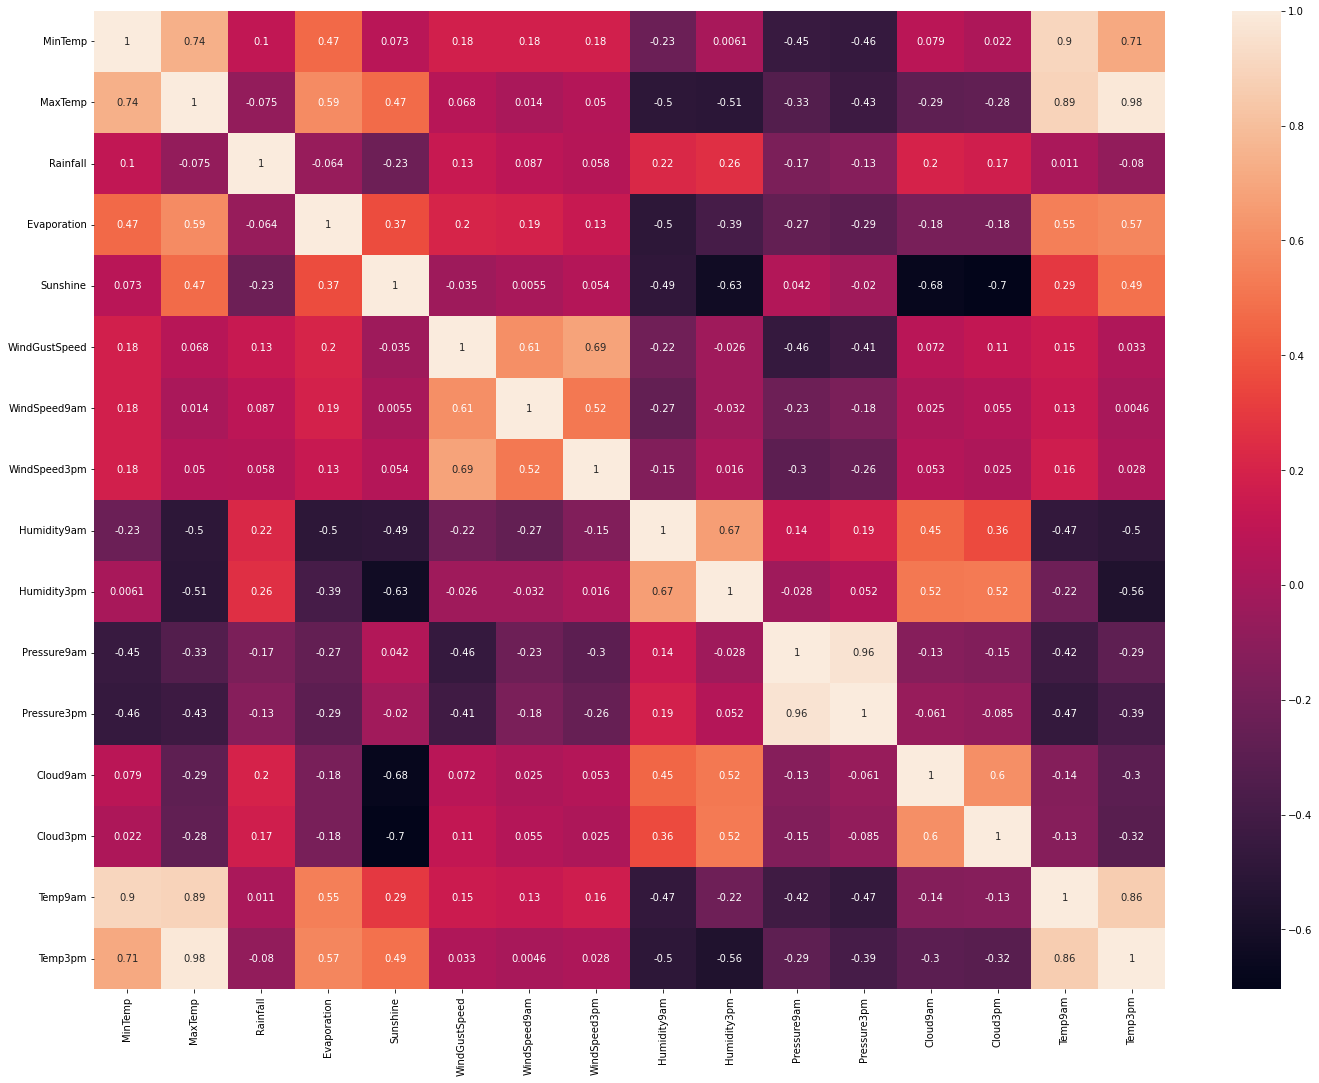

In [16]:
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(), annot=True)

In [17]:
import plotly.express as px

In [18]:
#fig = px.box(df, y="RainTomorrow")

#fig.show()

In [19]:
categorical_features=list(df.select_dtypes(include="object").columns)
numerical_features=list(df.select_dtypes(exclude="object").columns)

In [20]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [21]:
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [22]:
df[categorical_features].isnull().any()

Date            False
Location        False
WindGustDir      True
WindDir9am       True
WindDir3pm       True
RainToday        True
RainTomorrow     True
dtype: bool

In [23]:
# filling the null values in categorical_features

In [24]:
df["WindGustDir"]=df.WindGustDir.fillna("unknown")

In [25]:
df["WindDir9am"]=df.WindDir9am.fillna("unknown")

In [26]:
df["WindDir3pm"]=df.WindDir3pm.fillna("unknown")

In [27]:
df["RainToday"]=df.RainToday.fillna("unknown")

In [28]:
df["RainTomorrow"]=df.RainTomorrow.fillna("unknown")

In [29]:
df[categorical_features].isnull().any()

Date            False
Location        False
WindGustDir     False
WindDir9am      False
WindDir3pm      False
RainToday       False
RainTomorrow    False
dtype: bool

In [30]:
df[numerical_features].isnull().any()

MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustSpeed    True
WindSpeed9am     True
WindSpeed3pm     True
Humidity9am      True
Humidity3pm      True
Pressure9am      True
Pressure3pm      True
Cloud9am         True
Cloud3pm         True
Temp9am          True
Temp3pm          True
dtype: bool

In [31]:
# filling the value of numerical_feature

In [32]:
#df["MinTemp"]=df.MinTemp.fillna(df.mean())
#df["MaxTemp"]=df.MaxTemp.fillna(df.mean())
#df["Rainfall"]=df.Rainfall.fillna(df.mean())
#df["Evaporation"]=df.Evaporation.fillna(df.mean())
#df["Sunshine"]=df.Sunshine.fillna(df.mean())
#df["WindGustSpeed"]=df.WindGustSpeed.fillna(df.mean())
#df["WindSpeed9am"]=df.WindSpeed9am.fillna(df.mean())
#df["WindSpeed3pm"]=df.WindSpeed3pm.fillna(df.mean())
#df["Humidity9am"]=df.Humidity9am.fillna(df.mean())
#df["Pressure3pm"]=df.Pressure3pm.fillna(df.mean())
#df["Cloud9am "]=df.Cloud9am.fillna(df.mean())
#df["Temp9am"]=df.Temp9am.fillna(df.mean())
#df["Temp3pm"]=df.Temp3pm.fillna(df.mean())
#df["Humidity3pm"]=df.Humidity3pm.fillna(df.mean())
#df["Pressure9am"]=df.Pressure9am.fillna(df.mean())
#df["Cloud3pm"]=df.Cloud3pm.fillna(df.mean())


In [33]:
df[numerical_features].isnull().any()

MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustSpeed    True
WindSpeed9am     True
WindSpeed3pm     True
Humidity9am      True
Humidity3pm      True
Pressure9am      True
Pressure3pm      True
Cloud9am         True
Cloud3pm         True
Temp9am          True
Temp3pm          True
dtype: bool

In [34]:
#df["MinTemp"]=df.MinTemp.fillna(df.mean())

In [35]:
#df["MaxTemp"]=df.MaxTemp.fillna(df.mean())

In [36]:
#df["Rainfall"]=df.Rainfall.fillna(df.mean())

In [37]:
#df[numerical_features].isnull().any()

In [38]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Humidity3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [39]:
df[numerical_features].isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
dtype: bool

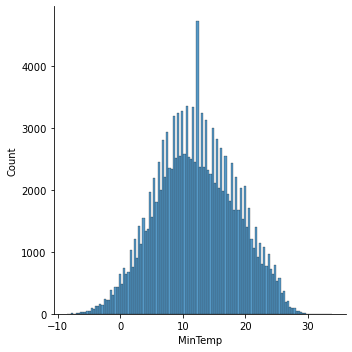

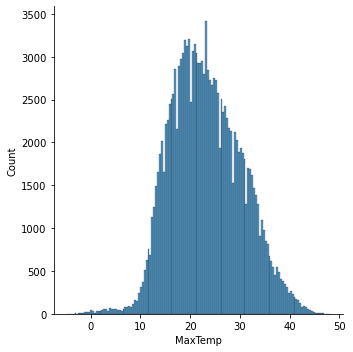

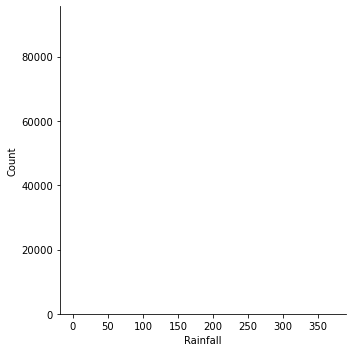

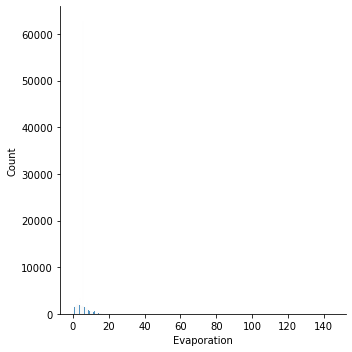

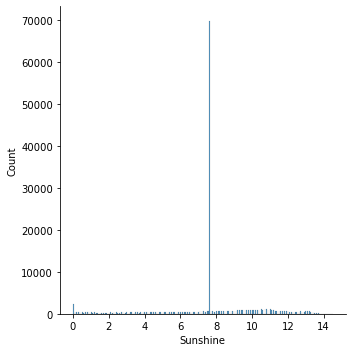

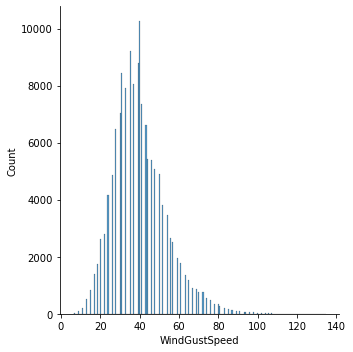

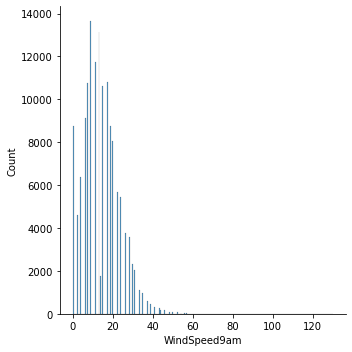

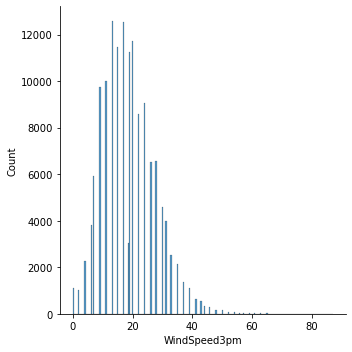

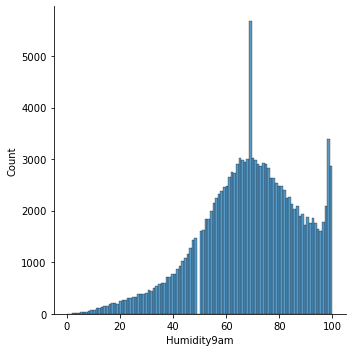

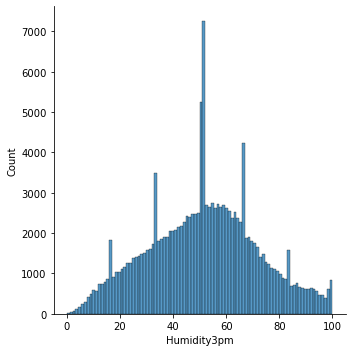

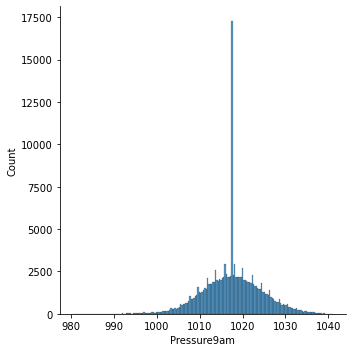

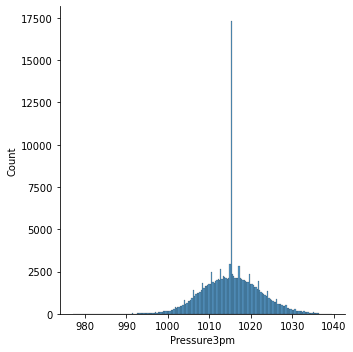

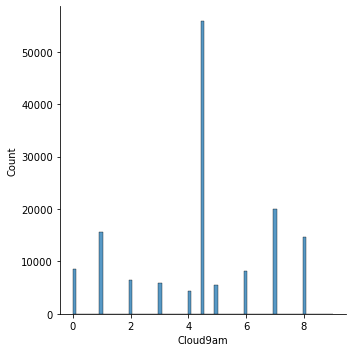

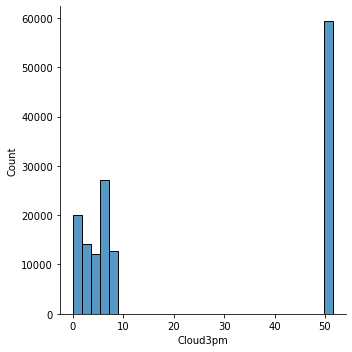

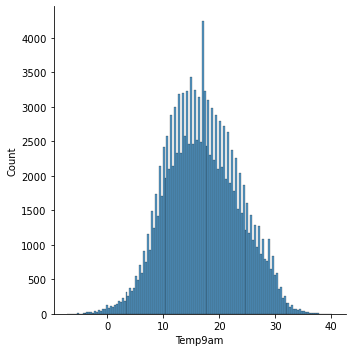

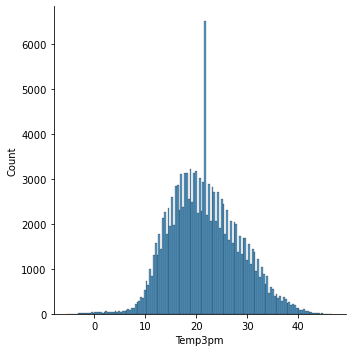

In [40]:
for i in numerical_features:
    sns.displot(df[i])
    plt.show()

In [41]:
#outliers


In [42]:
def iqr(df,col):
    q1,q3=np.percentile(df[col], [25,75])
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    df=df[(df[col]>lower) & (df[col]<upper)]
    df.boxplot(col)
    

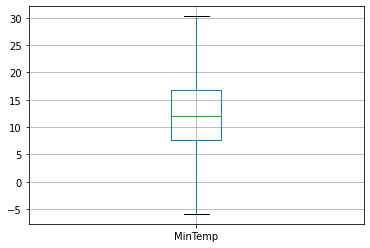

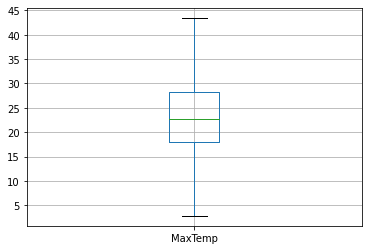

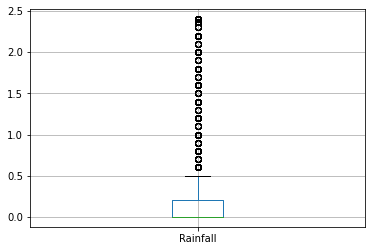

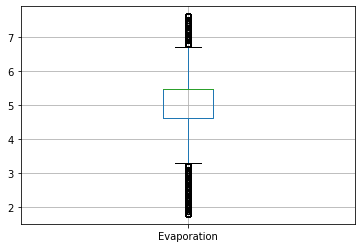

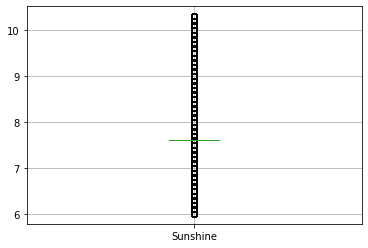

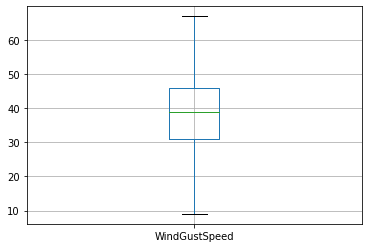

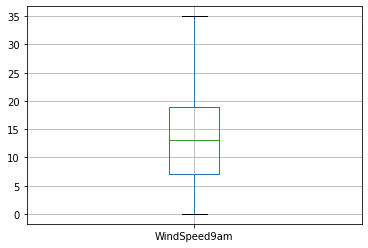

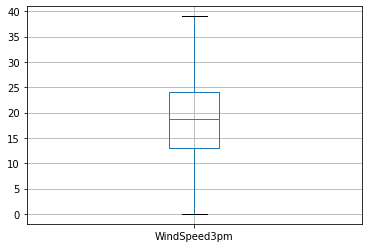

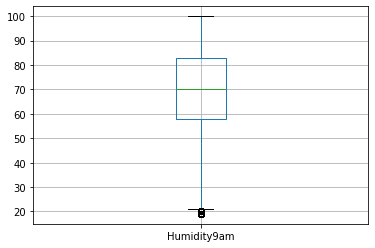

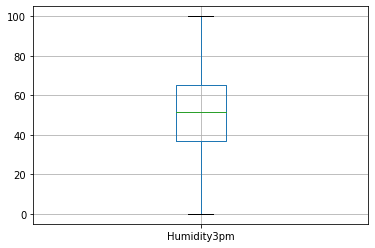

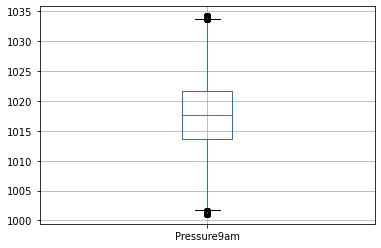

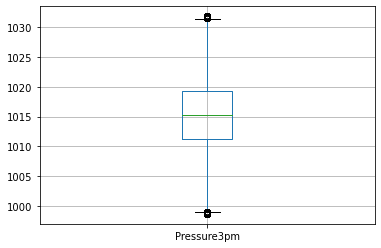

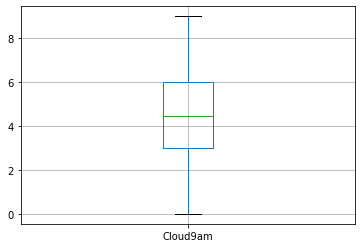

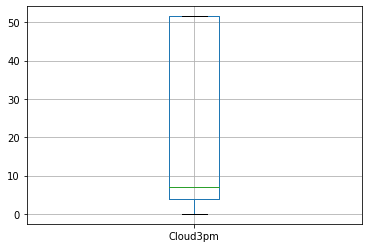

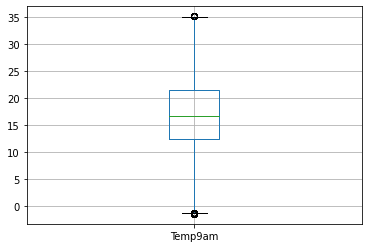

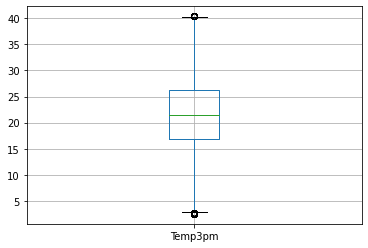

In [43]:
for i in numerical_features:
    iqr(df,i)
    plt.show()

In [44]:
# spliting date column in datetime

In [45]:
df["Date"]=pd.to_datetime(df["Date"])

In [46]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [47]:
df.drop("Date", axis=1, inplace=True)

In [48]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,...,1007.1,8.000000,51.539116,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,...,1007.8,4.447461,51.539116,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,...,1008.7,4.447461,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,...,1012.8,4.447461,51.539116,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5


In [49]:
from sklearn.preprocessing import LabelEncoder


In [50]:
le=LabelEncoder()

In [51]:
le

LabelEncoder()

In [52]:
for i in df.select_dtypes(include="object").columns:
    df[i]=le.fit_transform(df[i].astype(str))

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int32  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int32  
 9   WindDir3pm     145460 non-null  int32  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [54]:
df[i]

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    2
Name: RainTomorrow, Length: 145460, dtype: int32

In [55]:
x=df.drop(["RainTomorrow"], axis=1)

In [56]:
y=df["RainTomorrow"]

In [57]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,2,13.4,22.900000,0.6,5.468232,7.611178,13,44.00000,13,14,...,1007.7,1007.1,8.000000,51.539116,16.9,21.8,0,2008,12,1
1,2,7.4,25.100000,0.0,5.468232,7.611178,14,44.00000,6,15,...,1010.6,1007.8,4.447461,51.539116,17.2,24.3,0,2008,12,2
2,2,12.9,25.700000,0.0,5.468232,7.611178,15,46.00000,13,15,...,1007.6,1008.7,4.447461,2.000000,21.0,23.2,0,2008,12,3
3,2,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,9,0,...,1017.6,1012.8,4.447461,51.539116,18.1,26.5,0,2008,12,4
4,2,17.5,32.300000,1.0,5.468232,7.611178,13,41.00000,1,7,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,5.468232,7.611178,0,31.00000,9,1,...,1024.6,1020.3,4.447461,51.539116,10.1,22.4,0,2017,6,21
145456,41,3.6,25.300000,0.0,5.468232,7.611178,6,22.00000,9,3,...,1023.5,1019.1,4.447461,51.539116,10.9,24.5,0,2017,6,22
145457,41,5.4,26.900000,0.0,5.468232,7.611178,3,37.00000,9,14,...,1021.0,1016.8,4.447461,51.539116,12.5,26.1,0,2017,6,23
145458,41,7.8,27.000000,0.0,5.468232,7.611178,9,28.00000,10,3,...,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,2017,6,24


In [58]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    2
Name: RainTomorrow, Length: 145460, dtype: int32

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
x_train.shape

(116368, 24)

In [62]:
x_test.shape

(29092, 24)

In [63]:
y_train.shape

(116368,)

In [64]:
y_test.shape

(29092,)

In [65]:
# feature scalling

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
ss=StandardScaler()

In [68]:
ss

StandardScaler()

In [69]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr=LinearRegression()

In [72]:
lr

LinearRegression()

In [73]:
lr.fit(x_train,y_train)

LinearRegression()

In [74]:
y_pred=lr.predict(x_test)

In [75]:
y_pred

array([0.62821303, 0.00183104, 0.97066538, ..., 0.22759054, 0.32510282,
       0.2446911 ])

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
#accuracy_score(y_pred,y_test)

In [79]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, y_pred)

In [80]:
from sklearn.metrics import r2_score

In [81]:
#accuracy_score(y_pred,y_test)

In [82]:
r2_score(y_pred,y_test)

-1.3505147155336763

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
mean_squared_error(y_test,y_pred)

0.1690522815888209

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
lgr= LogisticRegression()

In [87]:
lgr

LogisticRegression()

In [88]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [89]:
y_pred=lgr.predict(x_test)

In [90]:
y_pred

array([1, 0, 2, ..., 0, 0, 0])

In [91]:
accuracy_score(y_pred,y_test)

0.8290595352674275

In [92]:
confusion_matrix(y_test, y_pred)

array([[20748,  1193,    71],
       [ 3260,  3096,    64],
       [  304,    81,   275]], dtype=int64)

In [93]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.94      0.85      0.90     24312\n           1       0.48      0.71      0.57      4370\n           2       0.42      0.67      0.51       410\n\n    accuracy                           0.83     29092\n   macro avg       0.61      0.74      0.66     29092\nweighted avg       0.87      0.83      0.84     29092\n'

In [94]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [95]:
y_pred=classifier.predict(x_test)

In [96]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [97]:
accuracy_score(y_pred,y_test)

0.8206036023649114

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
dtr=DecisionTreeRegressor()

In [100]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [101]:
y_pred=dtr.predict(x_test)

In [102]:
y_pred

array([0., 0., 1., ..., 1., 1., 0.])

In [103]:
accuracy_score(y_pred,y_test)

0.7713460745222054

In [104]:
#from sklearn.svm import SVR

In [105]:
#svr=SVR()

In [106]:
#svr

In [107]:
#svr.fit(x_train,y_train)

In [108]:
#y_pred-svr.predict(x_test)

In [109]:
#accuracy_score(y_pred,y_test)

In [110]:
from sklearn.svm import SVC

In [111]:
svc=SVC()

In [112]:
svc

SVC()

In [113]:
svc.fit(x_train,y_train)

SVC()

In [114]:
y_pred=svc.predict(x_test)

In [115]:
y_pred

array([1, 0, 2, ..., 0, 0, 0])

In [116]:
accuracy_score(y_pred,y_test)

0.8399216279389523